<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2012/Assignment-B/yolo_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Loading the json file which is in coco format**

In [0]:
import json

with open('/content/gdrive/My Drive/eva/yoloData_coco.json') as f:
  data = json.load(f)

In [4]:
data.keys()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])

**info:** It contains information about the dataset.

**licenses:** It contains a list of image licenses that apply to images in the dataset.

**categories:** It contains a list of categories. Categories can belong to a supercategory.

**images:** It contains all the attributes of the images in the dataset such as file name,width,height etc.

**annotations:** It contains information of the object segmentation and bounding box dimensions.

In [5]:
data['info']

{'contributor': '',
 'date_created': 'Thu Apr 16 2020 21:36:45 GMT+0530 (India Standard Time)',
 'description': 'Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)',
 'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/',
 'version': '1',
 'year': 2020}

In [13]:
data['annotations'][0].keys()

dict_keys(['id', 'image_id', 'segmentation', 'area', 'bbox', 'iscrowd'])

**id:** It is the unique id for the annotations.

**image_id:** It corresponds to the imageid that we have in the image section.

**segmentation:** the x and y coordinates for the vertices of the polygon around every object instance for the segmentation masks.

**area:** area of the bounding box

**bbox:** the dimensions of the bounding box: *(x-top left, y-top left, width, height)*

**iscrowd:** If we have a single object segmentation then iscrowd is set to zero. For a collection of objects present in the image, we set iscrowd=1, in which case RLE is used.RLE is Run Length Encoding. When iscrowd=1, then we add attribute counts and size in the segmentation section.


In [14]:
data['annotations'][0]

{'area': 22165,
 'bbox': [79, 32, 143, 155],
 'id': 0,
 'image_id': '0',
 'iscrowd': 0,
 'segmentation': [79, 32, 222, 32, 222, 187, 79, 187]}

In [15]:
len(data['annotations'])

50

In [10]:
data['images'][0].keys()

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])

**id**: It is the unique id of the image

**height**: height of image in pixels

**width**: width of the image in pixels

**file_name**: name of file

In [11]:
data['images'][0]

{'date_captured': '',
 'file_name': '1.jfif',
 'height': 187,
 'id': 0,
 'license': 1,
 'width': 269}

In [12]:
len(data['images'])

50

Normalizing the bounding boxes width and height to make the bounding boxes comparable

In [31]:
import math
df = pd.DataFrame()
for i in range(len(data['annotations'])):
  
  image_width = data['images'][i]['width']
  image_height = data['images'][i]['height']
  bbox_width = data['annotations'][i]['bbox'][2]
  bbox_height = data['annotations'][i]['bbox'][3]

  # Normalizing the bounding boxes width and height to make the bounding boxes comparable.
  width = bbox_width/image_width
  height = bbox_height/image_height
  log_width = math.log(width)
  log_height = math.log(height)

  df = df.append({'name': data['images'][i]['file_name'], 'image_width': image_width, 'image_height': image_height,'bbox_width':bbox_width,
                  'bbox_height':bbox_height,'normalized_bbox_w':width,'normalized_bbox_h':height,
                  'log_normalized_bbox_w':log_width,'log_normalized_bbox_h':log_height}, ignore_index=True) 

df = df[['name', 'image_width', 'image_height','bbox_width', 'bbox_height','normalized_bbox_w','normalized_bbox_h',
                  'log_normalized_bbox_w','log_normalized_bbox_h']]
df.head(5)

,name,image_width,image_height,bbox_width,bbox_height,normalized_bbox_w,normalized_bbox_h,log_normalized_bbox_w,log_normalized_bbox_h
0,1.jfif,269.0,187.0,143.0,155.0,0.531599,0.828877,-0.631867,-0.187683
1,2.jfif,260.0,194.0,103.0,189.0,0.396154,0.974227,-0.925953,-0.026111
2,3.jfif,299.0,168.0,105.0,113.0,0.351171,0.672619,-1.046483,-0.396576
3,4.jfif,277.0,182.0,196.0,168.0,0.707581,0.923077,-0.345903,-0.080043
4,5.jfif,273.0,185.0,163.0,132.0,0.597070,0.713514,-0.515722,-0.337554


Plot of width vs height

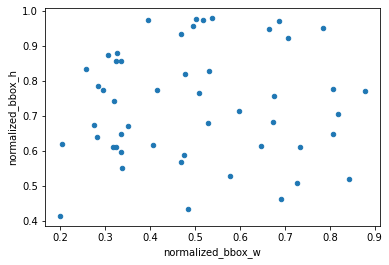

In [32]:
df.plot.scatter('normalized_bbox_w','normalized_bbox_h')

Log of the normalized_bbox_w,normalized_bbox_h will condense the data. Below shows the plot of this data.

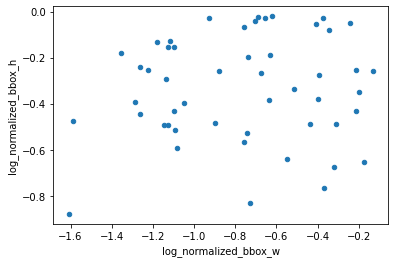

In [33]:
df.plot.scatter('log_normalized_bbox_w','log_normalized_bbox_h')

In [0]:
x = df[['log_normalized_bbox_w','log_normalized_bbox_h']].to_numpy()

# **Applying KMeans**

In [0]:
from sklearn.cluster import KMeans

**Elbow Plot to find optimal K value**

Text(0.5, 0, 'k')

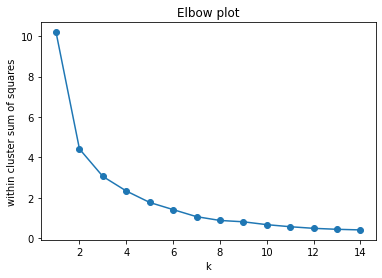

In [69]:
clusters = list(range(1,15))

inertias = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster).fit(x)
    inertias.append(kmeans.inertia_) # gives within-cluster sum-of-squares value

plt.plot(clusters,inertias,linestyle='-', marker='o')
plt.title('Elbow plot')
plt.ylabel('within cluster sum of squares')
plt.xlabel('k')

Applying kmeans for k = 2,3,4,5 after observing the eblow plot

In [0]:
kmeans = KMeans( n_clusters=2)
pred = kmeans.fit_predict(x)


In [46]:
kmeans.cluster_centers_

array([[-1.16874544, -0.35299712],
       [-0.48015995, -0.32227552]])

In [47]:
kmeans.cluster_centers_[:, 1]

array([-0.35299712, -0.32227552])

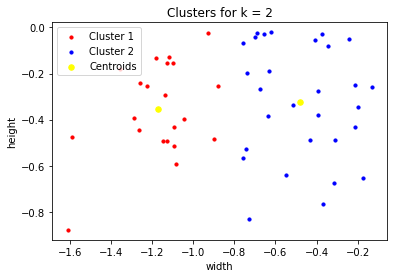

In [50]:
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters for k = 2')
plt.xlabel('width')
plt.ylabel('height')
plt.legend()
plt.show()

In [0]:
def kmeans(k,x):
  kmeans = KMeans( n_clusters=k)
  pred = kmeans.fit_predict(x)
  for i in range(k):
    label = 'Cluster '+str(i+1)
    plt.scatter(x[pred == i, 0], x[pred == i, 1], s = 10,  label = label)

  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
  title = 'Clusters for k = '+str(k)
  plt.title(title)
  plt.xlabel('width')
  plt.ylabel('height')
  plt.legend()
  plt.show()

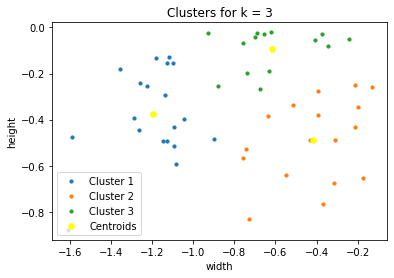

In [74]:
kmeans(3,x)

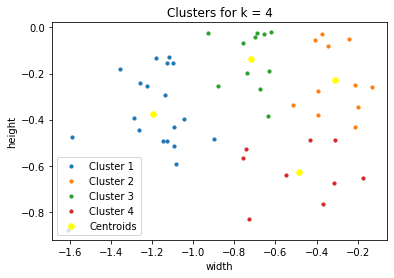

In [75]:
kmeans(4,x)

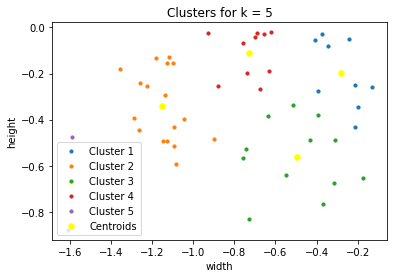

In [76]:
kmeans(5,x)